# CH03. 평가
---
머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있다. 성능 평가 지표(Evaluation Metric)은 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉜다. 회귀의 경우 대부분 실제값과 예측값의 오차 평균값에 기반한다. 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법이 회귀의 성능 평가 지표 유형이다. 분류의 평가방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있다. 0이냐, 1이냐 혹은 긍정/부정을 판단하는 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중요시되는 경우가 많다.
### 분류의 성능 평가 지표
- **정확도(Accuracy)**
- **오차행렬(Confusion Matrix)**
- **정밀도(Precision)**
- **재현율(Recall)**
- **F1 스코어**
- **ROC AUC**


## 01. 정확도(Accuracy)
---
- 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표이다.
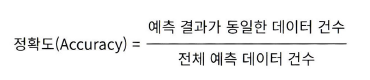
정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표이다. 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다. **정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.** 예를 들어 100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 된다. 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용해야한다.

```
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, rf_pred))
```

## 02. 오차 행렬(Confusion Matrix)
---
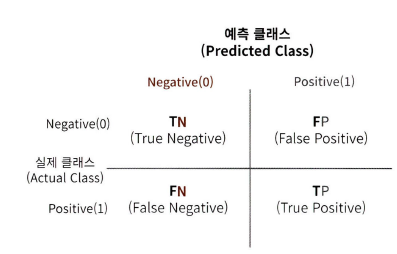
TN, FP, FN, TP 기호가 의미하는 것은 앞 문자 True/False는 예측값과 실제값이 '같은가/틀린가'를 의미한다. 뒤 문자 Negative/Positive는 예측 결과 값이 부정(0)/긍정(1)을 의미한다. 
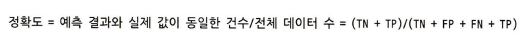
- 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으킨다. 

```
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rf_pred)
```

## 03. 정밀도(Precision)와 재현율(Recall)
---
##### 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
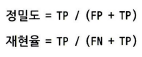
#### - 정밀도(Precision): 
예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율. Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불린다. 스팸메일 여부를 판단하는 모델의 경우 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우에 업무에 차질이 생기기에 정밀도가 중요하다. 
=> **실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우** 

#### - 재현율(Recall): 
실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율. 민감도(Sensitivity) 또는 TPR(True Positive)라고도 불린다. 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. 예를 들어 암 판단 모델은 재현율이 훨씬 중요한 지표이다. 실제 Positive인 암 환자를 Positive 양성이 아닌 Negative 음성으로 잘못 판단했을 경우 오류의 대가가 심각하기 때문이다. 반면 실제 Negative인 건강한 환자를 암 환자인 Positive로 예측한 경우면 다시 한번 재검사를 하는 수준의 비용이 소모될 것이다. 보험 사기와 같은 금융 사기 적발 모델도 재현율이 중요하다. 실제 금융거래 사기인 Positive건을 Negative로 잘못 판단하게 되면 회사에 미치는 손해가 클 것이다. 
=> **실제 Positive 양성인 데이터 예측을 Negative 음성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**
- 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다.

### 정밀도/재현율 트레이드오프(Trade-off)
정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 정밀도/재현율의 트레이드오프라고 부른다.
- predict_proba(): 개별 데이터별로 예측 결과 클래스 값이 아닌 예측 확률을 반환하는 메서드
- precision_recall_curve(): 정밀도와 재현율의 임계값에 따른 변화를 곡선 형태의 그래프로 시각화하는데 이용

```
from sklearn.metrics import precision_score, recall_score

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(precision_score(y_test, rf_pred))
print(recall_score(y_test, rf_pred))
```

## 04. F1 스코어
---
##### F1 스코어는 정밀도와 재현율을 결합한 지표로, 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.
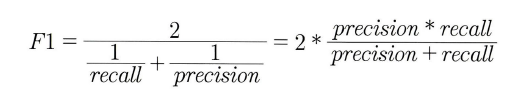

```
from sklearn.metrics import f1_score

print(f1_score(y_test, rf_pred))
```

## 05. ROC 곡선과 AUC
---
##### ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표



#### - ROC 곡선(Receiver Operation Characteristic Curve): 
FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선. FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 다른 TPR의 변화가 곡선 형태로 나타난다. **ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것이다.**
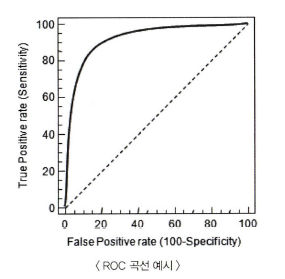
- 재현율 = 민감도(TPR): 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄 
- 특이성(TNR): 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄
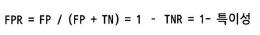

```
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
```

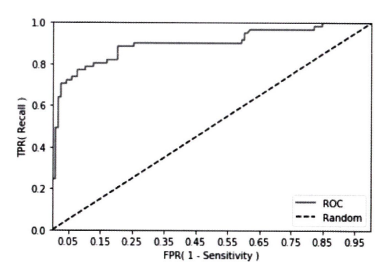
- 일반적으로  ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다.



#### - AUC(Area Under Curve):
**AUC 값은 ROC선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다.** AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다. 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 된다. 가운데 대각선 직선은 랜덤 수준의 이진 분류 AUC 값으로 0.5이다. 따라서 보통의 분류는 0.5 이상의 AUC 값을 가진다.

```
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, pred_proba))
```

